# Fetching crypto and tweets data.

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from TweetScraper import TweetScraper
from CryptoApi import CryptoApi
import pandas as pd
import numpy as np
import re


# scrp = TweetScraper(start='2023-08-10', end='2023-08-14', max_empty_pages=1, max_workers=1)
# new_tweets = scrp.parallel_download_tweets()
# new_twt = pd.DataFrame(new_tweets)

# with open('crypto_token.txt','r') as f:
#     token = f.readline()
    
# crypto = CryptoApi(token)
# crypto.get_data('btc','usd','day',period_count=90)

In [4]:
from datetime import datetime, timedelta

# dformat = '%Y-%m-%d %H:%M:%S'
# btc_old = pd.read_csv('Data/HourlyData/hourly_btc.csv')
# old = datetime.strptime(btc_old['time'].iloc[-1], dformat)

# start = (datetime.now() - (datetime.now() - old)).strftime(dformat) 
# end = datetime.now().strftime(dformat)

# with open('crypto_token.txt','r') as f:
#     token = f.readline()

# crypto = CryptoApi(token)
# period_count = (datetime.strptime(end, dformat)-datetime.strptime(start, dformat)).days*24
# period_count+=21
# new_btc  = crypto.fetch_data('btc','usd', period='hour', period_count=period_count)
# new_doge = crypto.fetch_data('doge','usd', period='hour', period_count=period_count)
# new_eth  = crypto.fetch_data('eth','usd', period='hour', period_count=period_count)

# # full_df = pd.concat([btc_old, new_btc], axis=0).reset_index(drop=True).drop('Unnamed: 0', axis=1)
# # full_df['time'] = pd.to_datetime(full_df['time'])
# # full_df = full_df.set_index('time')

# eth_old = pd.read_csv('Data/HourlyData/hourly_eth.csv')
# full_df = pd.concat([eth_old, new_eth], axis=0).reset_index(drop=True).drop('Unnamed: 0', axis=1)
# full_df['time'] = pd.to_datetime(full_df['time'])
# full_df = full_df.set_index('time')

# full_df.to_csv('Data/HourlyData/eth_upd.csv')

# doge_old = pd.read_csv('Data/HourlyData/hourly_doge.csv')
# full_df = pd.concat([doge_old, new_doge], axis=0).reset_index(drop=True).drop('Unnamed: 0', axis=1)
# full_df['time'] = pd.to_datetime(full_df['time'])
# full_df = full_df.set_index('time')

# full_df.to_csv('Data/HourlyData/doge_upd.csv')

In [5]:
# def update_data(crypto_name: str, currency: str, period: str):
#     old_df = pd.read_csv('Data/HourlyData/hourly_btc.csv')
#     old_df['time'] = pd.to_datetime(old_df['time'])
    
#     start = old_df['time'].iloc[-1].date().strftime("%Y-%m-%d") 
#     end = datetime.now().strftime("%Y-%m-%d")
    
#     with open('crypto_token.txt','r') as f:
#         token = f.readline()

#     crypto = CryptoApi(token)
#     period_count = (datetime.strptime(end,'%Y-%m-%d')-datetime.strptime(start,'%Y-%m-%d')).days    
#     new_df = crypto.fetch_data(crypto_name, currency, period=period, period_count=24*period_count)
    
#     return new_df

# rabbit = update_data('btc','usd','hour')

In [6]:
# old_btc = pd.read_csv('Data/HourlyData/hourly_btc.csv').drop('Unnamed: 0', axis=1)
# old_btc['time'] = pd.to_datetime(old_btc['time'])

# # rabbit = rabbit[rabbit['time'].isin(old_btc['time'])==False]
# wtfisthat = pd.merge(old_btc[old_btc.columns[:-2]], rabbit[rabbit.columns[:-2]], how='outer').set_index('time')
# # wtfisthat[wtfisthat.index]

# wtfisthat.index[0] >= datetime.strptime('2023-04-06','%Y-%m-%d')

In [7]:
# import matplotlib.pyplot as plt


# # wtfisthat.index = pd.to_datetime(wtfisthat.index)
# plt.figure(figsize=(12,8))
# plt.plot(wtfisthat['high'])

# Analysis of tweets

In [8]:
# new_tweets_df = TweetScraper().fetch_data('2023-04-10','2023-06-09', frequency='d')
# cleaned_df = TweetCleaner().transform(new_tweets_df)
# nlp_model = LDA().fit(cleaned_df)
# cleaned_df = extract_topics(nlp_model.topics)

# new_btc_df = CryptoApi().fetch_data()
# cleaned_btc = CryptoCleaner().transform(new_btc_df)
# xgb_model = XGBoost().fit(cleaned_btc)

In [9]:
from DataPreparation.CryptoPreprocessor import CryptoPreprocessor
from DataPreparation.TweetPreprocessor import TweetPreprocessor
from DataPreparation.TextVectorizer import TextVectorizer
from gensim.test.utils import datapath
from gensim.models import LdaMulticore
import json


# TODO: quickload this part 2m 43s
 
tweets_df = pd.read_csv(r'Data/elon_tweets.csv', index_col=0)
twt_prep = TweetPreprocessor(tweets_df)
mod_tweets_df = twt_prep.transform()

# text2vec = TextVectorizer()
# preprocessing_pipeline = text2vec.make_pipeline()
# id2word, corpus = preprocessing_pipeline.transform(mod_tweets_df['rawContent'].values.tolist())
# with open("corpus.json" , "w" ) as w:
#     json.dump(corpus , w)

temp_file = datapath(r"D:\Projects\ElonMuskCrypto\Models\NLPmodels\lda")
lda_model = LdaMulticore.load(temp_file)
id2word = lda_model.id2word
with open('corpus.json', 'r') as r:
    corpus = json.load(r)

In [10]:
btc_df = pd.read_csv('Data/btc_data.csv', index_col=0)
crypto_prep = CryptoPreprocessor()
# topics_btc = crypto_prep.transform(lda_model, mod_tweets_df, btc_df)
# topics_btc.to_csv('topics_btc.csv')

topics_btc = pd.read_csv('topics_btc.csv', index_col=0)
topics_btc.index = pd.to_datetime(topics_btc.index)

In [11]:
tweets = pd.read_csv(r'Data/elon_tweets.csv', index_col=0)
btc_df = pd.read_csv('Data/btc_data.csv')    
tweets['date'] = pd.to_datetime(tweets['date'])  
btc_df['time'] = pd.to_datetime(btc_df['time'])

# Tuning XGB

In [12]:
data = topics_btc.copy()

def predict(data, predictors, model, threshold=0.5):
    preds = model.predict_proba(data[predictors])[:,1]
    preds[preds >= threshold] = 1
    preds[preds < threshold]  = 0    
    return preds

In [13]:
def predict(train, test, predictors, model, year, threshold=0.5):
    model.fit(train[predictors], train['target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= threshold] = 1
    preds[preds < threshold]  = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')    
    combined = pd.concat([test['target'], preds], axis=1)
    combined[f'year_{year}'] = year
    
    return combined



In [14]:
def extract_dict(line: str, prepare_to_df=False):
    extracted_content = dict(re.findall(r"'(\w+)': '?({.*}|datetime.datetime\(.*\)|[\w\d/:\. ]*)'?", line))
    
    # Wraps dict values into lists to be easily represented as a DataFrame row.
    if prepare_to_df:
        for key,value in extracted_content.items():
            if value == '':
                extracted_content[key] = [None]
            else:
                extracted_content[key] = value
        
    return extracted_content

In [15]:
# trend_no_nan = data[data['Trend_365'].notna()].copy()

# data_with_nan = trend_no_nan.isna().mean().sort_values(ascending=False)
# for i,prop in zip(data_with_nan.index, data_with_nan):
#     if 'T_' not in i and prop != 0.0:
#         print(f'{i:<16}| {round(prop, 4)}')

In [16]:
# ppl = data['replyCount'].iloc[-400:-290].copy()
# ffill_imp = ppl.interpolate(method='bfill')

# plt.figure(figsize=(20,8))
# ffill_imp.plot(color='red', linestyle='dotted')
# ppl.plot(title='MaxSpeed')

In [17]:
# def add_lags(df):
#     df = df.copy()
#     target_map = df['target'].to_dict()
#     df['lag2'] = (df.index - pd.Timedelta('2 day')).map(target_map) 
#     df['lag7'] = (df.index - pd.Timedelta('7 day')).map(target_map) 
#     df['lag14'] = (df.index - pd.Timedelta('14 day')).map(target_map) 
#     df['lag30'] = (df.index - pd.Timedelta('30 day')).map(target_map) 
#     df['lag60'] = (df.index - pd.Timedelta('60 day')).map(target_map) 
#     df['lag90'] = (df.index - pd.Timedelta('90 day')).map(target_map) 
#     df['lag365'] = (df.index - pd.Timedelta('365 day')).map(target_map) 
#     return df

# data = add_lags(data)

In [18]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


def split_data(X, train_size, valid_size, test_size):
    X = X.set_index(np.arange(len(X)))
    train_idx = []
    valid_idx = []
    for i in range(0, len(X)-train_size-valid_size-test_size, valid_size):
        end_train = i+train_size
        train_idx.append(X[i: end_train].index)    
        
        end_valid = end_train+valid_size     
        valid_idx.append(X[end_train: end_valid].index)  
             
    test_idx = X[-test_size:].index
    
    return train_idx, valid_idx, test_idx

# train_idx, valid_idx, test_idx = split_data(data, 
#                                             train_size=365, 
#                                             valid_size=60, 
#                                             test_size=60)


test_size = 90

tss = TimeSeriesSplit(n_splits=5, test_size=test_size)

train_idx = []
valid_idx = []
test_idx = data.iloc[-test_size:].index.tolist()
for train, valid in tss.split(data.iloc[:-test_size]):
    train_idx.append(train)
    valid_idx.append(valid)

param_grid = {'n_estimators':np.arange(5,30,1),
              'max_depth':np.arange(2,15,1),
              'gamma':np.linspace(0, 5, 10),
              'alpha':np.arange(1,50,10),
              'lambda':np.arange(1,50,10),
              'learning_rate':np.arange(0.01, 0.5, 0.01),              
            #   'min_child_weight':np.linspace(1,8,15),
              'max_delta_step':np.linspace(0,1,10),
              'grow_policy':['depthwise', 'lossguide']
              }

n_iter = 10
class_cv = RandomizedSearchCV(XGBClassifier(), 
                              param_grid, 
                              n_jobs=-1, 
                              scoring=make_scorer(balanced_accuracy_score),
                              random_state=1,
                              return_train_score=True,
                              verbose=3,
                              cv=zip(train_idx, valid_idx),
                              n_iter=n_iter)

horizons = [2,7,21,28,60,90,180,364]
data, new_predictors = crypto_prep.add_trend_season(data, horizons)
predictors = data.columns[data.columns!='target']
class_cv.fit(data[predictors], data['target'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=<zip object at 0x0000020F38458040>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_...
                                        'max_delta_step': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
                   random_state=1, return_train_score=True,
                   scoring=make_scorer(balanced_accuracy_score), verbose=3)

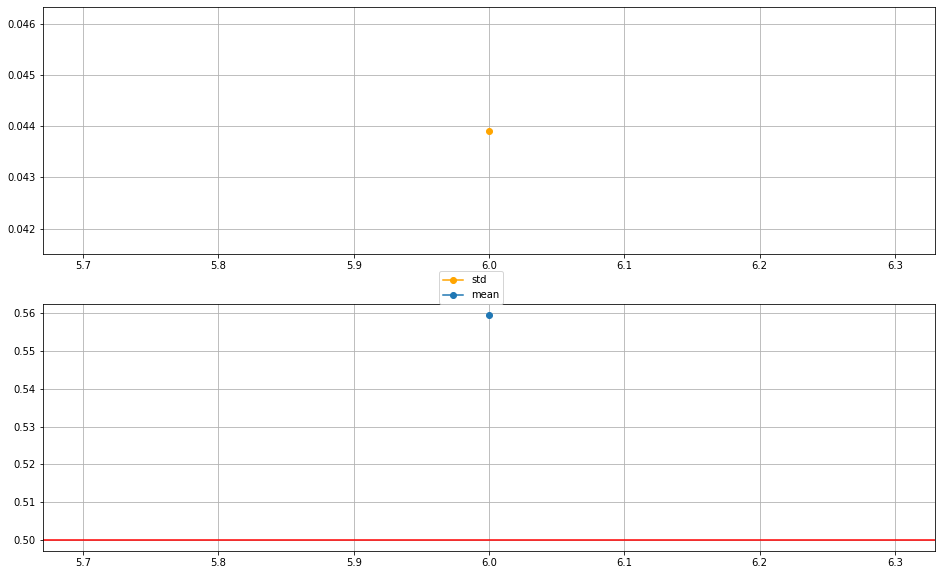

In [19]:
def select_best_models(tuner, std_error=0.05, mean_score=0.5):
    mask_mean_test = tuner.cv_results_['mean_test_score'] >= mean_score
    mask_mean_std  = tuner.cv_results_['std_test_score'] <= std_error

    combined_mask = np.logical_and(mask_mean_test, mask_mean_std)
    filtered_params = pd.DataFrame(tuner.cv_results_)
    filtered_params = filtered_params[combined_mask]

    return filtered_params

def show_diagnostics(tuner):
    fig,(ax1, ax2) = plt.subplots(2)
    fig.set_figwidth(16)
    fig.set_figheight(10)
    
    ax2.plot(tuner['mean_test_score'], label='mean', marker='o')
    ax2.axhline(0.5, color='red')
    ax1.plot(tuner['std_test_score'], label='std', color='orange', marker='o')
    fig.legend(loc='center')
    ax1.grid()
    ax2.grid()
    plt.show()
    
    
best_models = select_best_models(class_cv, std_error=0.055, mean_score=0.55)
show_diagnostics(best_models)

In [20]:
# select_best_models(class_cv, std_error=0.99, mean_score=0.01).to_csv('all_tuned_models2.csv')

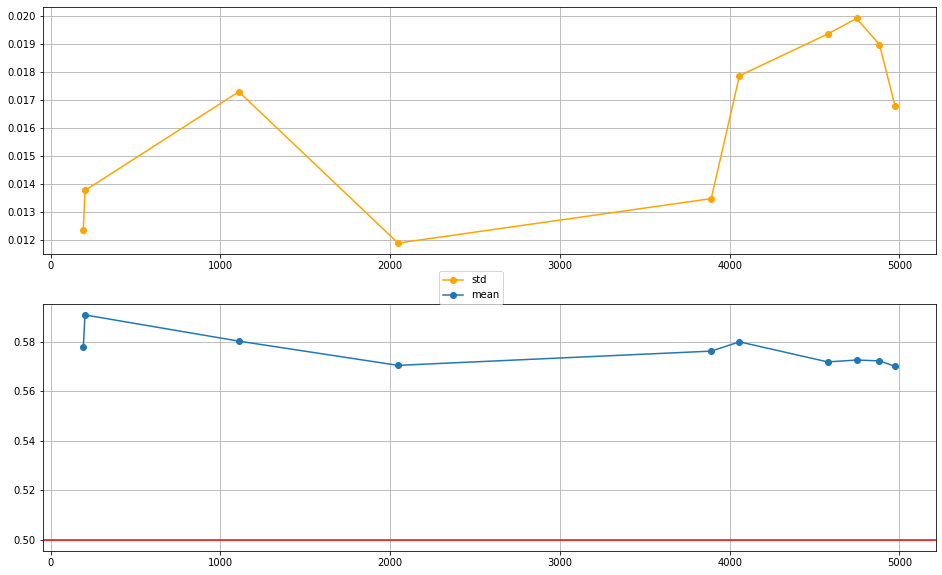

In [21]:
tuned_models = pd.read_csv('Models/Tuned_in_csv/all_tuned_models.csv', index_col=0)
show_diagnostics(tuned_models[(tuned_models['std_test_score']<=0.02) & (tuned_models['mean_test_score']>=0.57)])

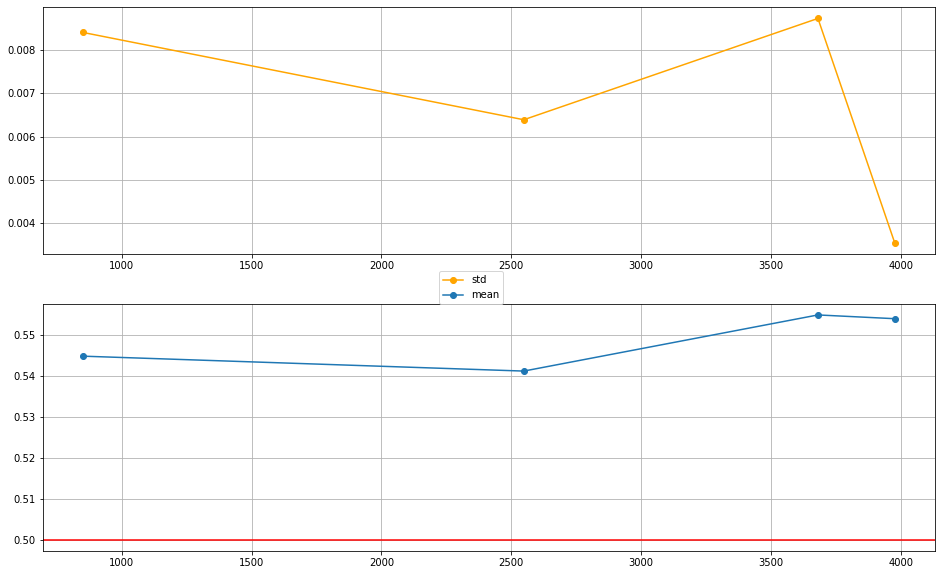

In [22]:
show_diagnostics(tuned_models[(tuned_models['std_test_score']<=0.01) & (tuned_models['mean_test_score']>=0.54)])

In [23]:
# TODO: i have to test my model not only on my last 90 days
# but few samples to ensure robustness to flexibility of data (during each year for ex)
# here im looking only at window approach and it's not the best but ok.

# TODOL: upload the best XGB model and return to tuning LDA

def backtest(X, train_idx, valid_idx, predictors, **params):
    X = X.copy()
    all_preds = []
    for train, test in zip(train_idx, valid_idx):
        X_train = X.iloc[train].copy()
        X_test  = X.iloc[test].copy()
                
        model = XGBClassifier(**params, n_jobs=-1)
        model.fit(X_train[predictors], X_train['target'])
        preds = balanced_accuracy_score(X_test['target'], model.predict(X_test[predictors]))
        all_preds.append(preds)
        
    return all_preds


very_cool = {'n_estimators': 48,
 'max_depth': 14,
 'learning_rate': 0.16,
 'lambda': 1,
 'grow_policy': 'lossguide',
 'gamma': 5.0,
 'alpha': 1}

In [24]:
best_params = best_models.iloc[0]['params'] 

# with open('Models/CRYPTOmodels/params.json', 'r') as f:
#     best_params = json.load(f)

bb = XGBClassifier(**best_params)
bb.fit(data[predictors].iloc[:-90], data['target'].iloc[:-90])

backtest(data, train_idx, valid_idx, predictors, **best_params)

[0.5888888888888889,
 0.592391304347826,
 0.5279034690799397,
 0.48855151816824294,
 0.6002964426877471]

In [25]:
# for key,value in best_params.items():
#     if type(value) == np.int32:
#         best_params[key] = int(value)
        
        
# with open('Models/CRYPTOmodels/params.json', 'w') as f:        
#     f.write(json.dumps(best_params))

In [26]:
balanced_accuracy_score(data['target'].iloc[-90:], bb.predict(data[predictors].iloc[-90:]))

0.5625

In [27]:
# best Model saver & loader pattern

# cur_ts = int(datetime.now().timestamp())
# latest_xgb.save_model(f'Models/CRYPTOmodels/xgbc_{cur_ts}.json')

# default_c.load_model('Models/CRYPTOmodels/xgbc_1693759086.json')

# model_features = pd.DataFrame(columns=default_c.feature_names_in_)
# model_features.columns[model_features.columns.isin(data[predictors].columns)==False]

In [28]:
best_model = XGBClassifier()
best_model.load_model('Models/CRYPTOmodels/xgbc_1694187252.json')
A = pd.DataFrame(data=zip(best_model.feature_names_in_, best_model.feature_importances_), columns=['feature','importance'])
balanced_accuracy_score(data['target'].iloc[-90:], best_model.predict(data[predictors].iloc[-90:]))

0.5925

0.9657691568136215


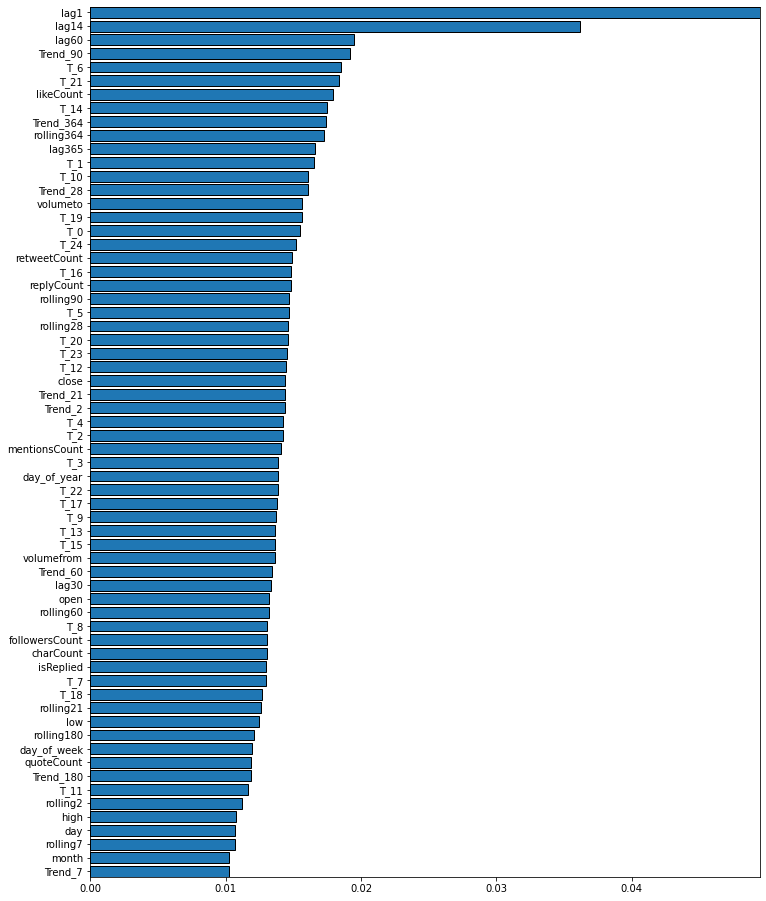

In [29]:
B = A.copy()
# B = B[~B['feature'].str.contains('T_')]
B = B[B['importance']>=0.01].sort_values(by='importance', ascending=False)

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(16)
ax.barh(B['feature'], B['importance'], edgecolor='black')
ax.invert_yaxis()
ax.margins(0,0)

print(sum(B['importance']))
plt.show()

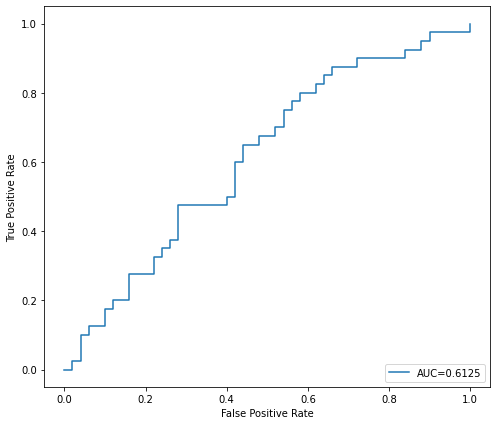

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve


X_test, y_test = data[best_model.feature_names_in_].iloc[-90:], data['target'].iloc[-90:]
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)


def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.figure(figsize=(8,7))
    plt.plot(fpr, tpr, label=f'AUC={auc}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    
plot_roc_curve(y_test, y_pred_proba)


# Hypothesis testing

In [31]:
#TODO: create hypothesis testing class

topic_cols = data.columns[data.columns.str.contains(r'T_\d')]
tweet_cols = topic_cols.append(mod_tweets_df.columns).drop(['date','rawContent'])
# no_topics_data = data[data.columns[mask==False]].copy()


best_model = XGBClassifier()
best_model.load_model('Models/CRYPTOmodels/xgbc_1694187252.json')

In [32]:
no_tweet_data = data.copy()
no_tweet_data[tweet_cols] = np.nan

cols = no_tweet_data.columns[no_tweet_data.columns!='target']

nt_model_score = backtest(no_tweet_data, train_idx, valid_idx, cols)
nt_model_score, balanced_accuracy_score(no_tweet_data['target'].iloc[-90:], best_model.predict(no_tweet_data[cols].iloc[-90:]))

([0.4666666666666667,
  0.5158102766798419,
  0.4788838612368024,
  0.5761572921851668,
  0.4713438735177865],
 0.5275)

## Comparing two types of models
***
by randomly training 15000 candidates for data including tweets and data excluding tweets
i ensure that:
1.  the results are robuts to any coincidence
2.  not tuned for certain type of data (one or another) 
and selected from the same parameter space (even though very vast)
***

In [33]:
tweets_cv = RandomizedSearchCV(XGBClassifier(), 
                              param_grid, 
                              n_jobs=-1, 
                              scoring=make_scorer(balanced_accuracy_score),
                              random_state=1,
                              return_train_score=True,
                              verbose=3,
                              cv=zip(train_idx, valid_idx),
                              n_iter=100)

horizons = [2,7,21,28,60,90,180,364]
data, new_predictors = crypto_prep.add_trend_season(data, horizons)
predictors = data.columns[data.columns!='target']
# tweets_cv.fit(data[predictors], data['target'])

In [34]:
no_tweets_cv = RandomizedSearchCV(XGBClassifier(), 
                              param_grid, 
                              n_jobs=-1, 
                              scoring=make_scorer(balanced_accuracy_score),
                              random_state=1,
                              return_train_score=True,
                              verbose=3,
                              cv=zip(train_idx, valid_idx),
                              n_iter=100)

horizons = [2,7,21,28,60,90,180,364]
no_tweet_data, new_predictors = crypto_prep.add_trend_season(no_tweet_data, horizons)
predictors = no_tweet_data.columns[no_tweet_data.columns!='target']
# no_tweets_cv.fit(no_tweet_data[predictors], no_tweet_data['target'])

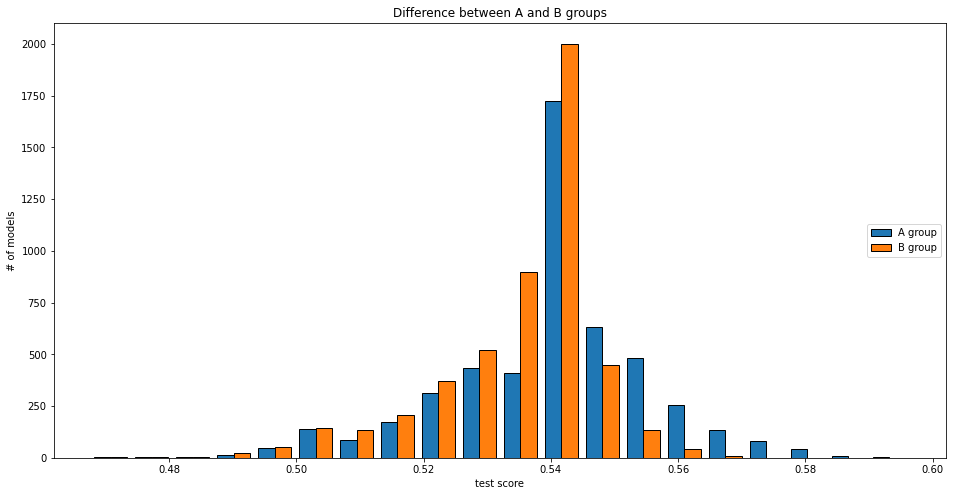

In [35]:
def plot_groups(tuner_A, tuner_B, bins=10):
    scores_A = tuner_A['mean_test_score'].copy()
    scores_B = tuner_B['mean_test_score'].copy()
    
    fig, ax1= plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(8)
    
    n,b,_ = ax1.hist([scores_A, scores_B], 
                    ec='k', 
                    label=['A group','B group'], 
                    bins=bins, 
                    range=(np.min([scores_A, scores_B])-0.001,
                           np.max([scores_A, scores_B])+0.001))
    ax1.legend(loc='right')
    ax1.set(title='Difference between A and B groups', xlabel='test score', ylabel='# of models')           
    
    return n,b


A_group = pd.read_csv('Models/Tuned_in_csv/with_tweets_models.csv', index_col=0)
B_group = pd.read_csv('Models/Tuned_in_csv/without_tweets_models.csv', index_col=0)
n,bins  = plot_groups(A_group, B_group, 20)

In [36]:
from dash import Dash, dcc, html
from dash.dependencies import Output, Input
import plotly.express as px


A_group = pd.read_csv('Models/Tuned_in_csv/with_tweets_models (1).csv', index_col=0)
B_group = pd.read_csv('Models/Tuned_in_csv/without_tweets_models (1).csv', index_col=0)
df = pd.DataFrame(A_group['mean_test_score']).join(B_group['mean_test_score'], lsuffix='_A')
df = df.rename(columns={'mean_test_score_A':'A_scores',
                        'mean_test_score':'B_scores'})

MIN,MAX = 10,25
app = Dash(__name__)
app.layout = html.Div([dcc.Graph(id='histogram'),
                       html.P("Bins:"),
                       dcc.Slider(id='bins-slider',min=MIN, max=MAX,step=1, value=8)                                 
                       ])

@app.callback(Output('histogram', 'figure'),
              [Input('bins-slider', 'value')])
def update_histogram(bins):
    fig = px.histogram(df, 
                       nbins=bins, 
                    #    barmode="stack",
                       labels={'value':'mean test score'},
                       title=f'bins = {bins}',
                       width=950,
                       height=500)
    
    fig.update_traces(marker_line_color='black',
                      marker_line_width=0.5)
    return fig


app.run(debug=True)

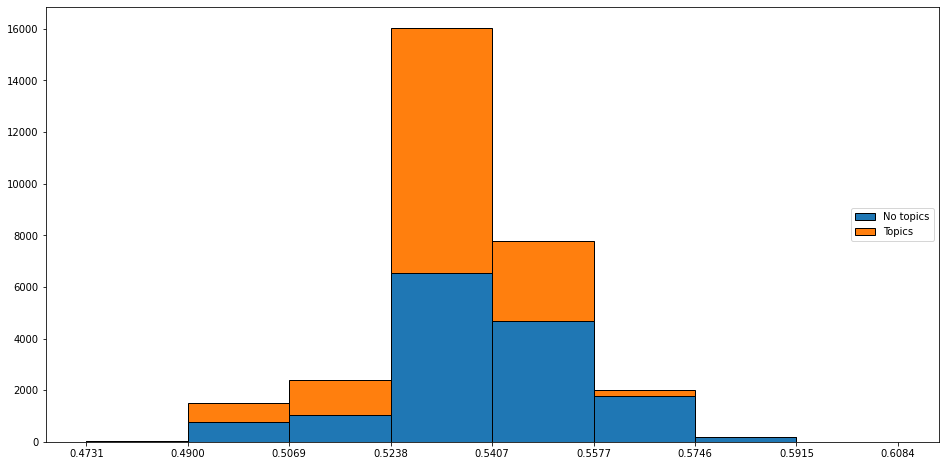

In [37]:
def display_(df, nbins=10):
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(16)

    # mean_dif = abs(np.mean(scores_a) - np.mean(scores_b))
    # std_dif = abs(np.std(scores_a) - np.std(scores_b))
    # ax.title.set_text(f'Mean difference is {mean_dif*100:.2f}%, {std_dif*100:.2f}%')
    counts, bins = np.histogram(df['A_scores'], bins=nbins)
    
    ax.hist(df, ec='k', bins=nbins, stacked=True)
    ax.legend(loc='right', labels=['No topics','Topics'])
    ax.set_xticks(bins)
    plt.show()


# why do my plotly and matlotlib graphs differ?

display_(df, 8)

In [38]:
#  1. how to account for tweet cols and exclude them during stat testing
#  2. iterate 5000 times for each type of model (with tweets and without)
#  3. compare distributions of the two and make conclusion based solely on it

In [39]:
fig = px.histogram(df, nbins=10, height=400, width=700)
fig.update_traces(marker_line_color='black',
                  marker_line_width=0.5)
fig.show()

In [40]:
from scipy import stats

_, pvalue = stats.wilcoxon(df['A_scores'], df['B_scores'], alternative='greater')
pvalue, pvalue < 0.05

(0.0, True)

In [41]:
tstat, pvalue = stats.ttest_ind(df['A_scores'], df['B_scores'], alternative='greater', equal_var=False)
pvalue, pvalue < 0.05

(4.368299415283316e-214, True)

In [45]:
import pyLDAvis
from pyLDAvis.gensim import prepare

temp_file = datapath(r"D:\Projects\ElonMuskCrypto\Models\NLPmodels\lda")    
lda_model = LdaMulticore.load(temp_file)
# id2word = Dictionary.load('model.id2word')

pyLDAvis.save_html(prepare(lda_model, corpus, id2word), 'lda1.html')